In [33]:
import pandas as pd
import numpy as np
from selenium import webdriver
import main
import visualizer
from mplsoccer.pitch import Pitch
from matplotlib.colors import to_rgba
import matplotlib.pyplot as plt

In [34]:
match_urls = [
    "https://www.whoscored.com/Matches/1491975/Live/Spain-LaLiga-2020-2021-Barcelona-Villarreal",
    "https://www.whoscored.com/Matches/1491984/Live/Spain-LaLiga-2020-2021-Celta-Vigo-Barcelona",
    "https://www.whoscored.com/Matches/1491995/Live/Spain-LaLiga-2020-2021-Barcelona-Sevilla",
    "https://www.whoscored.com/Matches/1492021/Live/Spain-LaLiga-2020-2021-Getafe-Barcelona",
    "https://www.whoscored.com/Matches/1492033/Live/Spain-LaLiga-2020-2021-Barcelona-Real-Madrid",
    "https://www.whoscored.com/Matches/1492047/Live/Spain-LaLiga-2020-2021-Deportivo-Alaves-Barcelona",
    "https://www.whoscored.com/Matches/1492327/Live/Spain-LaLiga-2020-2021-Barcelona-Real-Betis",
    "https://www.whoscored.com/Matches/1492008/Live/Spain-LaLiga-2020-2021-Atletico-Madrid-Barcelona",
    "https://www.whoscored.com/Matches/1492024/Live/Spain-LaLiga-2020-2021-Barcelona-Osasuna",
    "https://www.whoscored.com/Matches/1492054/Live/Spain-LaLiga-2020-2021-Cadiz-Barcelona",
    "https://www.whoscored.com/Matches/1492065/Live/Spain-LaLiga-2020-2021-Barcelona-Levante",
    "https://www.whoscored.com/Matches/1492121/Live/Spain-LaLiga-2020-2021-Barcelona-Real-Sociedad",
    "https://www.whoscored.com/Matches/1492089/Live/Spain-LaLiga-2020-2021-Barcelona-Valencia",
    "https://www.whoscored.com/Matches/1492060/Live/Spain-LaLiga-2020-2021-Real-Valladolid-Barcelona",
    "https://www.whoscored.com/Matches/1492070/Live/Spain-LaLiga-2020-2021-Barcelona-Eibar"
]
opponents = [
    'Villarreal', 'Celta-Vigo', 'Sevilla', 'Getafe', 'Real-Madrid', 'Alaves', 'Betis', 'Atletico',
    'Osasuna', 'Cadiz', 'Levante', 'Real-Sociedad', 'Valencia', 'Valladolid', 'Eibar'
]

teamId = 65

options = webdriver.ChromeOptions()    
driver = webdriver.Remote(
    command_executor='ylenium_driver_1:4444/wd/hub',
    options=options,
)


In [ ]:
row = 0
col = 0

pitch_color = '#111111'
pitch = Pitch(
    pitch_type='statsbomb',
    orientation='horizontal',
    pitch_color=pitch_color,
    line_color='#c7d5cc',
    figsize=(16,11),
    goal_type='box',
    constrained_layout=True,
    tight_layout=False,
    layout=(2, 2)
)
fig, axes = pitch.draw()

# for url in match_urls:
    
match_data = main.getMatchData(driver, match_urls[1])

matches_df = main.createMatchesDF(match_data)

events_df = main.createEventsDF(match_data)

matchId = match_data['matchId']

#     home_data = matches_df['home'][matchId]
#     away_data = matches_df['away'][matchId]

#     if matches_df['venueName'].bool == 'Camp Nou':
#         venue = 'home'
#     else:
#         venue = 'away'

#     team_players_dict = {}
#     for player in matches_df[venue][matchId]['players']:
#         team_players_dict[player['playerId']] = player['name']

#     match_events_df = events_df[events_df['matchId']==matchId].reset_index(drop=True)

#     passes_df = match_events_df.loc[[
#             row['displayName']=='Pass' for row in list(match_events_df['type'])
#     ]].reset_index(drop=True)

#     passes_df = passes_df[passes_df['teamId']==teamId].reset_index().drop('index', axis=1)

#     passes_df = passes_df.loc[[
#         row['displayName']=='Successful' for row in list(
#             passes_df['outcomeType']
#         )
#     ]].reset_index(drop=True)
    
#     playerIds = []
#     for i in passes_df['playerId']:
#         playerIds.append(int(i))

#     passes_df.insert(
#         27, 
#         column='playerName', 
#         value=[
#             team_players_dict[i] for i in playerIds
#         ]
#     )

#     passes_df.insert(
#         28, 
#         column='passRecipientId', 
#         value=passes_df['playerId'].shift(-1)
#     )

#     passes_df.insert(
#         29,
#         column='passRecipientName',
#         value=passes_df['playerName'].shift(-1)
#     )

#     passes_df.dropna(subset=['passRecipientName'], inplace=True)

#     match_player_df = pd.DataFrame()
#     player_names = []
#     player_ids = []
#     player_pos = []
#     player_kit_number = []

#     for player in matches_df[venue][matchId]['players']:
#         player_names.append(player['name'])
#         player_ids.append(player['playerId'])
#         player_pos.append(player['position'])
#         player_kit_number.append(player['shirtNo'])

#     match_player_df['playerId'] = player_ids
#     match_player_df['playerName']=player_names
#     match_player_df['playerPos']=player_pos
#     match_player_df['playerKitNumber']=player_kit_number

#     passes_df = passes_df.merge(
#         match_player_df,
#         on=['playerId', 'playerName'],
#         how='left',
#         validate='m:1'
#     )
#     passes_df = passes_df.merge(
#         match_player_df.rename({
#           'playerId': 'passRecipientId', 'playerName': 'passRecipientName'  
#         }, axis='columns'),
#         on=['passRecipientId', 'passRecipientName'],
#         how='left',
#         validate='m:1',
#         suffixes=['', '_Receipt']
#     )

#     passes_df = passes_df[passes_df['playerPos'] != 'Sub']
#     passes_formation = passes_df[[
#             'id', 'playerKitNumber', 'playerKitNumber_Receipt']].copy()

#     location_formation = passes_df[['playerKitNumber', 'x', 'y']]

#     average_locs_and_count = location_formation.groupby('playerKitNumber').agg(
#         {'x':['mean', 'median'], 'y':['mean', 'median', 'count']}
#     )
#     # average_locs_and_count = location_formation.groupby(
#     #         'playerKitNumber').agg({'x': ['mean'], 'y': ['mean', 'count']})

#     average_locs_and_count.columns = ['x_mean', 'x_median', 'y_mean', 'y_median', 'count']

#     passes_formation['kitNo_max'] = passes_formation[[
#         'playerKitNumber', 'playerKitNumber_Receipt'
#     ]].max(axis='columns')

#     passes_formation['kitNo_min'] = passes_formation[[
#             'playerKitNumber', 'playerKitNumber_Receipt'
#     ]].min(axis='columns')

#     passes_between = passes_formation.groupby(
#         ['kitNo_max', 'kitNo_min']
#     )['id'].count().reset_index()

#     passes_between.rename({'id': 'pass_count'}, axis='columns', inplace=True)

#     passes_between = passes_between.merge(
#         average_locs_and_count,
#         left_on='kitNo_min',
#         right_index=True)

#     passes_between = passes_between.merge(
#         average_locs_and_count,
#         left_on='kitNo_max',
#         right_index=True,
#         suffixes=['','_end']
#     )

#     max_lw = 10
#     max_marker_size = 1000
#     max_line_width = max_lw
#     passes_between['width'] = passes_between['pass_count'] / \
#         passes_between['pass_count'].max() * max_line_width

#     average_locs_and_count['marker_size'] = (
#         average_locs_and_count['count'] / average_locs_and_count['count'].max() * max_marker_size
#     )

#     min_transparency = 0.3
#     color = np.array(to_rgba('white'))
#     color = np.tile(color, (len(passes_between), 1))
#     c_transparency = passes_between['pass_count'] / passes_between['pass_count'].max()
#     c_transparency = (c_transparency * (1 - min_transparency)) + min_transparency
#     color[:,3] = c_transparency



#     pitch.lines(
#         passes_between['x_mean'] / 100 * 120,
#         80 - passes_between['y_mean'] / 100 * 80,
#         passes_between['x_mean_end'] / 100 * 120,
#         80 - passes_between['y_mean_end'] / 100 * 80,
#         lw=passes_between['width'],
#         color='#CC33FF',
#         zorder=1,
#         ax=axes[row,col]
#     )
#     pitch.scatter(
#         average_locs_and_count['x_mean'] /
#         100 * 120,
#         80 - average_locs_and_count['y_mean'] /
#         100 * 80,
#         s=1000,
#         alpha=0.8,
#         c='#FFFFFF',
#         edgecolors='#00CC99',
#         linewidth=7,
#         ax=axes[row,col]
#     )

#     for index, row in average_locs_and_count.iterrows():
#         pitch.annotate(index,
#                        xy=(row['x_mean'] / 100 * 120, 80 - row['y_mean'] / 100 * 80),
#                        c='#222111',
#                        va='center',
#                        ha='center',
#                        size=22,
#                        ax=axes[row,col])
    
#     col += 1
#     if col == 2:
#         col = 0
#         row += 1
#     elif row == 2:
#         break



    # pitch.lines(
    #     passes_between['x_median'] / 100 * 120,
    #     80 - passes_between['y_median'] / 100 * 80,
    #     passes_between['x_median_end'] / 100 * 120,
    #     80 - passes_between['y_median_end'] / 100 * 80,
    #     lw=passes_between['width'],
    #     color='#990099',
    #     zorder=1,
    #     ax=ax
    # )
    # pitch.scatter(
    #     average_locs_and_count['x_median'] /
    #     100 *
    #     120,
    #     80 -
    #     average_locs_and_count['y_median'] /
    #     100 *
    #     80,
    #     s=1000,
    #     alpha=0.8,
    #     color='#000000',
    #     edgecolors='#FF0033',
    #     linewidth=5,
    #     ax=ax)
    # for index, row in average_locs_and_count.iterrows():
    #     print(index)
    #     pitch.annotate(index,
    #                    xy=(row['x_median'] / 100 * 120,
    #                        80 - row['y_median'] / 100 * 80),
    #                    c='white',
    #                    va='baseline',
    #                    ha='left',
    #                    size=33,
    #                                           weight='bold',
    #                    ax=ax)

#     plt.text(29,-5, f"Barca'positioning based on Passes [vs {opponent}]", color='white',alpha=1, fontsize=20) 
#     plt.text(0,77, '@Bucciaratimes', color='white',alpha=0.8, fontsize=18) 
#     plt.text(72,77, 'Source: Fbref.com | Whoscored.com',color='white',alpha=0.8, fontsize=18)


In [ ]:
# passes_df.columns.tolist()
# match_player_df
# passes_df[['playerId','playerName', 'playerKitNumber', 'playerKitNumber_Recipt']].head(10)
# passes_formation
average_locs_and_count
# passes_between

In [ ]:
a = pd.DataFrame({'numA':[1,2,3,4,5], 'numB':[5,4,3,2,1]})
b = pd.DataFrame({'numA':[1,2,3,4,5], 'numB':[5,4,3,2,1], 'numC':[50,40,30,20,10]})

In [ ]:
e = a.merge(
    b,
    how='left',
    on=['numA'],
    suffixes=['', '_2']
)

In [ ]:
e

NameError: name 'col' is not defined

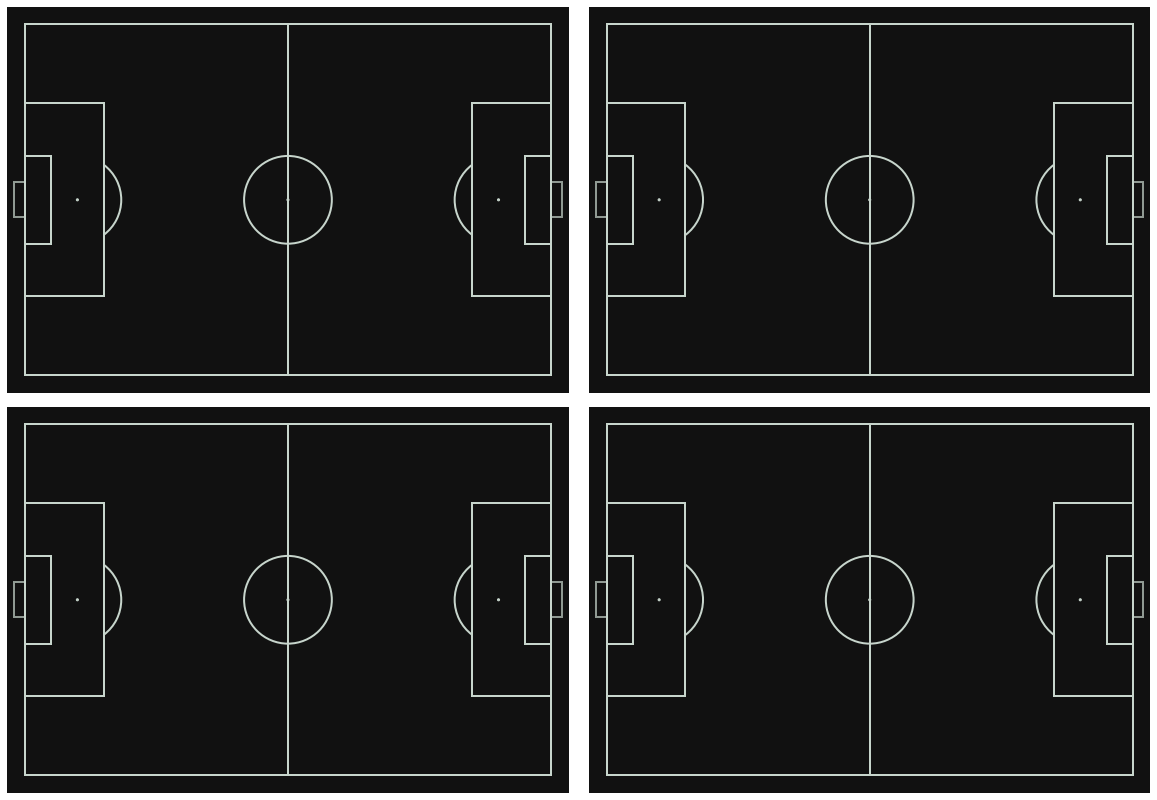

In [296]:
pitch_color = '#111111'
pitch = Pitch(
    pitch_type='statsbomb',
    orientation='horizontal',
    pitch_color=pitch_color,
    line_color='#c7d5cc',
    figsize=(16,11),
    goal_type='box',
    constrained_layout=True,
    tight_layout=False,
    layout=(2,2)
)
fig, axes = pitch.draw()


pitch.lines(
    passes_between['x_mean'] / 100 * 120,
    80 - passes_between['y_mean'] / 100 * 80,
    passes_between['x_mean_end'] / 100 * 120,
    80 - passes_between['y_mean_end'] / 100 * 80,
    lw=passes_between['width'],
    color='#CC33FF',
    zorder=1,
    ax=axes[row,col]
)
pitch.scatter(
        average_locs_and_count['x_mean'] /
        100 * 120,
        80 - average_locs_and_count['y_mean'] /
        100 * 80,
        s=1000,
        alpha=0.8,
        c='#FFFFFF',
        edgecolors='#00CC99',
        linewidth=7,
        ax=axes[row,col]

)

for index, row in average_locs_and_count.iterrows():
        pitch.annotate(index,
                       xy=(row['x_mean'] / 100 * 120, 80 - row['y_mean'] / 100 * 80),
                       c='#222111',
                       va='center',
                       ha='center',
                       size=22,
                       ax=axes[row,col]
        )